In [ ]:
%cd /content/
!git clone https://github.com/AlexeyAB/darknet

/content
Cloning into 'darknet'...
remote: Enumerating objects: 13733, done.
remote: Total 13733 (delta 0), reused 0 (delta 0), pack-reused 13733
Receiving objects: 100% (13733/13733), 12.31 MiB | 16.92 MiB/s, done.
Resolving deltas: 100% (9373/9373), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!make

make: *** No targets specified and no makefile found.  Stop.


In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 05K4.rar
 0.txt
 14-19.pdf
 20150101_053051.jpg
'2021_CVR_ZEMOSO TECH_SHORTLIST OF STUDENTS.gsheet'
'2021_CVR_ZEMOSO TECH_SHORTLIST OF STUDENTS.xlsx'
 576.rar
 ADDRESS.docx
 adminHome.aspx.gdoc
'Anyfile Notepad Files'
 ap.pdf
 arrayliststack.java
 BasicPrograms_09-12-2019.pdf
 bbnnFlowcharts.pdf
'Brain out.gdoc'
 BTECH.gdoc
'Call A Spade A Spade.gdoc'
'Class notes.gdoc'
 Classroom
'Cm from exp curve to range kutta method.pdf'
'cm indu.pdf'
'cm notess1.pdf'
 cm.pdf
'Colab Notebooks'
 digiramam.zip
 downloadfile.docx
 downloadfile.gdoc
'dsc (1).pdf'
 dscassgnmnt.pdf
 dsc.pdf
'Eager Beaver.gdoc'
'et course file.pdf'
'et notes jahnavi).pdf'
'First 6.pdf'
'Google Photos'
 grecaptcha.docx.gdoc
 images
 img2.zip
'Imp docs of jeenal part2.pdf'
'Important docs of jeenal jain.pdf'
 index.ts
'invited talk 18.12.19.jpg'
'jeenal ppt.gslides'
'jeenal ppt.pptx'
"Let's Roll The Dice.gdoc"
'm2 .pdf'
'Maths assignment .pdf'
'miniabs (1).rtf.gdoc'
 miniabs.rtf.gdoc
'Mini project Documentation.docx'
'Mod

In [ ]:
!ls /mydrive/yolov3

 backup					   obj.data
'Copy of yolo-obj_final_vehicle.weights'   obj.names
 final					   obj.zip
 final.weights				   plates.json
 generate_train.py			   yolov3_custom.cfg
 obj


In [ ]:
!cp /mydrive/yolov3/obj.zip ../

In [ ]:
!cp /mydrive/yolov3/obj.zip ../
!unzip ../obj.zip -d /content/darknet/data

Archive:  ../obj.zip
  inflating: /content/darknet/data/obj/0.jpg  
  inflating: /content/darknet/data/obj/0.txt  
  inflating: /content/darknet/data/obj/1.jpg  
  inflating: /content/darknet/data/obj/1.txt  
  inflating: /content/darknet/data/obj/10.jpg  
  inflating: /content/darknet/data/obj/10.txt  
  inflating: /content/darknet/data/obj/100.jpg  
  inflating: /content/darknet/data/obj/100.txt  
  inflating: /content/darknet/data/obj/101.jpg  
  inflating: /content/darknet/data/obj/101.txt  
  inflating: /content/darknet/data/obj/102.jpg  
  inflating: /content/darknet/data/obj/102.txt  
  inflating: /content/darknet/data/obj/103.jpg  
  inflating: /content/darknet/data/obj/103.txt  
  inflating: /content/darknet/data/obj/104.jpg  
  inflating: /content/darknet/data/obj/104.txt  
  inflating: /content/darknet/data/obj/105.jpg  
  inflating: /content/darknet/data/obj/105.txt  
  inflating: /content/darknet/data/obj/106.jpg  
  inflating: /content/darknet/data/obj/106.txt  
  inflati

In [ ]:
download('cfg/yolov3.cfg')

In [ ]:
!cp /mydrive/yolov3/final/yolo-obj.cfg ./cfg

In [ ]:
!cp /mydrive/yolov3/final/obj.names ./data
!cp /mydrive/yolov3/final/obj.data  ./data

In [ ]:
!cp /mydrive/yolov3/generate_train.py ./
!python generate_train.py

In [ ]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

In [ ]:
!./darknet detector train data/obj.data cfg/yolov-obj.cfg darknet53.conv.74 -dont_show

In [ ]:
!./darknet detector train data/obj.data cfg/yolov-obj.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

In [ ]:
%cd /content/darknet/cfg
!sed -i 's/batch=64/batch=1/' yolo-obj.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolo-obj.cfg
%cd ..


[Errno 2] No such file or directory: '/content/darknet/cfg'
/
sed: can't read yolo-obj.cfg: No such file or directory
sed: can't read yolo-obj.cfg: No such file or directory
/


In [ ]:
!cp /mydrive/yolov3/final/yolo-obj_final_vehicle.weights ./darknet

In [ ]:
%cd darknet
!make



[Errno 20] Not a directory: 'darknet'
/content/darknet
chmod +x *.sh


In [ ]:
!cp /mydrive/img2.zip ../
!unzip ../img2.zip -d /content/darknet/data/

Archive:  ../img2.zip
   creating: /content/darknet/data/img2/
  inflating: /content/darknet/data/img2/63.jpg  
   creating: /content/darknet/data/__MACOSX/
   creating: /content/darknet/data/__MACOSX/img2/
  inflating: /content/darknet/data/__MACOSX/img2/._63.jpg  
  inflating: /content/darknet/data/img2/77.jpg  
  inflating: /content/darknet/data/__MACOSX/img2/._77.jpg  
  inflating: /content/darknet/data/img2/88.jpg  
  inflating: /content/darknet/data/__MACOSX/img2/._88.jpg  
  inflating: /content/darknet/data/img2/29.txt  
  inflating: /content/darknet/data/img2/15.txt  
  inflating: /content/darknet/data/img2/114.txt  
  inflating: /content/darknet/data/img2/100.txt  
  inflating: /content/darknet/data/img2/128.txt  
  inflating: /content/darknet/data/img2/129.txt  
  inflating: /content/darknet/data/img2/101.txt  
  inflating: /content/darknet/data/img2/115.txt  
  inflating: /content/darknet/data/img2/14.txt  
  inflating: /content/darknet/data/img2/28.txt  
  inflating: /conte

In [ ]:
%cd /content/darknet
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolo-obj.cfg /mydrive/yolov3/final/yolo-obj_final_vehicle.weights  -ext_output -dont_show -out result.json <data/valid.txt

/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV isn't used - data augmentation will be slow 
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.40

In [ ]:
%cd /content/darknet
!./darknet detector test /content/darknet/data/obj.data /content/darknet/cfg/yolo-obj.cfg /mydrive/yolov3/final/yolo-obj_final_vehicle.weights /mydrive/images/rotated.jpeg -ext_output -dont_show -out result.json 

/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV isn't used - data augmentation will be slow 
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.40

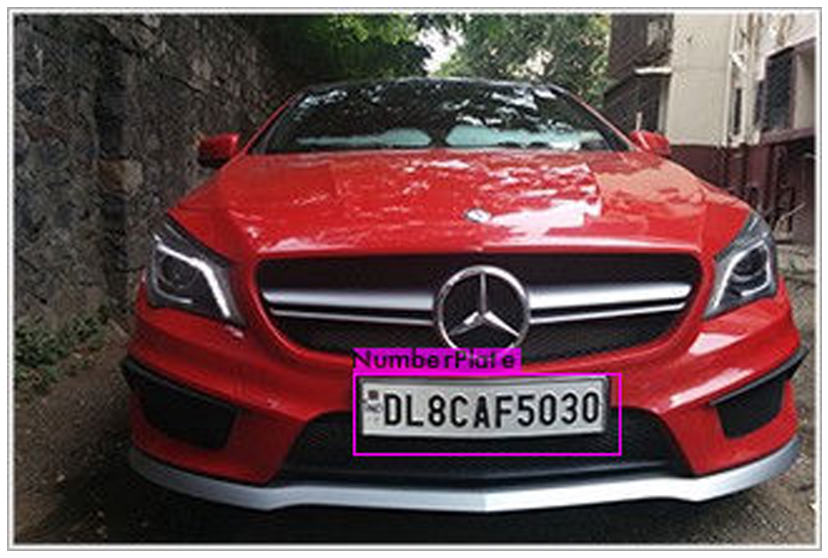

In [ ]:
imShow("predictions.jpg")

In [ ]:
%cd darknet
!sed -i 's/OPENCV=1/OPENCV=0/g' Makefile
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/g' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/g' Makefile

!make

/content/darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/http_stream.cpp -o obj/http_stream.o
./src/http_stream.cpp: In member function ‘bool JSON_sender::write(const char*)’:
./src/http_stream.cpp:249:21: warning: unused variable ‘n’ [-Wunused-variable]
                 int n = _write(client, outputbuf, outlen);
                     ^
gcc -Iinclude/ -I3rdparty/stb/include -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -W

In [ ]:
!make

chmod +x *.sh


In [ ]:
import pandas as pd
import json
with open('result.json') as file:
    data = json.load(file)
df = pd.DataFrame(data)
df

,frame_id,filename,objects
0,1,/mydrive/images/rotated.jpeg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat..."


In [ ]:
med=[]
def check(x):
    for y in x:
        if y['name']=="NumberPlate":
                    return True
    return False
df['plates']=df['objects'].transform(lambda temp:check(temp))

In [ ]:
df=df[df['plates']]
df['filename']=df['filename'].transform(lambda f:f.split('/')[-1])
in_book=list(df['filename'])

In [ ]:
import subprocess
proc=subprocess.Popen('ls', shell=True, stdout=subprocess.PIPE, )
output=proc.communicate()[0]
output=output.decode('utf-8').split('\n')
output=list(output)

In [ ]:

p=set(output)-set(in_book)

In [ ]:
med=[]
def check2(x):
    for y in x:
        if y['name']=="NumberPlate":
                    return y
    return False
df['plate_data']=df['objects'].transform(lambda temp:check2(temp))

In [ ]:
df

,frame_id,filename,objects,plates,plate_data
0,1,rotated.jpeg,"[{'class_id': 0, 'name': 'NumberPlate', 'relat...",True,"{'class_id': 0, 'name': 'NumberPlate', 'relati..."


In [ ]:
df=df.drop(['frame_id','objects','plates'],axis=1)

In [ ]:
df['plate_data'][0]

{'class_id': 0,
 'confidence': 0.96878,
 'name': 'NumberPlate',
 'relative_coordinates': {'center_x': 0.590036,
  'center_y': 0.747427,
  'height': 0.149069,
  'width': 0.327433}}

In [ ]:

def details(x,flag_2):
        co=x['relative_coordinates']
        wid=float(co['width'])/2.0
        hi=float(co['height'])/2.0
        if flag_2=='y2':
            return float(co['center_y'])+hi
        if flag_2=='x2':
            return float(co['center_x'])+wid
        if flag_2=='x1':
            return float(co['center_x'])-wid
        if flag_2=='y1':
            return float(co['center_y'])-hi
df['x1']=df['plate_data'].transform(lambda f:details(f,'x1'))    
df['y1']=df['plate_data'].transform(lambda f:details(f,'y1'))  
df['x2']=df['plate_data'].transform(lambda f:details(f,'x2'))  
df['y2']=df['plate_data'].transform(lambda f:details(f,'y2'))

In [ ]:

from PIL import Image
count=0
for x,y in df.iterrows():
        img = Image.open('predictions.jpg')
            #'/content/darknet/data/img2/'+str(y['filename']))
        dim=img.size
        w,h=dim[0],dim[1]
        x1=y['x1']*(w-10)
        x2=y['x2']*(w+10)
        y1=y['y1']*(h-10)
        y2=y['y2']*(h+10)
        area=(x1,y1,x2,y2)
        print(count)
        cropped_img = img.crop(area)
        cropped_img=cropped_img.convert('RGB')
        cropped_img.save("/content/gdrive/My Drive/val/"+'big'+str(x)+'.jpg')
        count+=1

0


In [ ]:
import os
import json
import requests

API_KEY = '410798c1c5e349389b1ac99c254fc1e2'
ENDPOINT = 'https://jeenal.cognitiveservices.azure.com/vision/v3.0/ocr'
DIR = r'/content/gdrive/My Drive/val/'

def handler():
    text = ''
    for filename in sorted(os.listdir(DIR)):
        if filename.endswith(".jpg"): 
            pathToImage = '{0}/{1}'.format(DIR, filename)
            results = get_text(pathToImage)
            text += parse_text(results)
    print(text)
    open('output.txt', 'w').write(text)

def parse_text(results):
    text = ''
    for region in results['regions']:
        for line in region['lines']:
            for word in line['words']:
                text += word['text'] + ' '
            text += '\n'
    return text  

def get_text(pathToImage):
    print('Processing: ' + pathToImage)
    headers  = {
        'Ocp-Apim-Subscription-Key': API_KEY,
        'Content-Type': 'application/octet-stream'
    }
    params   = {
        'language': 'eng',
        'detectOrientation ': 'true'
    }
    payload = open(pathToImage, 'rb').read()
    response = requests.post(ENDPOINT, headers=headers, params=params, data=payload)
    results = json.loads(response.content)
    return results

if __name__ == '__main__':
    handler()


Processing: /content/gdrive/My Drive/val//0.jpg


KeyError: ignored

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!./darknet detector map data/obj.data cfg/yolo-obj.cfg yolo-obj_final_vehicle.weights -points 0 -iou_thresh 0.05 -thresh 0.3

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV isn't used - data augmentation will be slow 
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 64, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   3 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   5 conv    128       3 x 3/ 2    304 x 304 x  64 ->  152 x 152 x 128 3.407 BF
   6 conv     64       1 x 1/ 1    152 x 152 x 128 ->  152 x 152 x  64 0.379 BF
   7 conv    128       3 x 3/ 1    152 x 152 x  64 ->  152 x 152 x 128 3.407 BF
   8 Shortcut

In [ ]:
%cd /mydrive/val
#storing all cropped images' names to a list
import subprocess
proc=subprocess.Popen('ls', shell=True, stdout=subprocess.PIPE, )
output=proc.communicate()[0]
output=output.decode('utf-8').split('\n')
output=list(output)

/content/gdrive/My Drive/val


In [ ]:
print (output)

['0.jpg', '118.jpg0.jpg', '131.jpg', '213.jpg0.jpg', '216.jpg0.jpg', 'big0.jpg', 'rotated.jpeg0.jpg', '']


In [ ]:
from PIL import Image
from io import BytesIO
#image_name will be a list of all file names
#image_number will be the Number Plate content
image_name=[]
image_number=[]
# Replace <Subscription Key> with your valid subscription key for Microsoft Vision API.
subscription_key ='410798c1c5e349389b1ac99c254fc1e2'
 
assert subscription_key
vision_base_url = 'https://jeenal.cognitiveservices.azure.com/vision/v3.0/'
ocr_url = vision_base_url + "ocr"
for x in output:
    try:
        image_url = x
        image_data = open(image_url, "rb").read()
        headers = {'Ocp-Apim-Subscription-Key': subscription_key, 'Content-Type': 'application/octet-stream'}
        params = {'language': 'unk', 'detectOrientation': 'true'}
        data = {'url': image_url}
        response = requests.post(ocr_url, headers=headers, params=params, data = image_data)
        response.raise_for_status()

        analysis = response.json()
        line_infos = [region["lines"] for region in analysis["regions"]]
        word_infos = []
        for line in line_infos:
             for word_metadata in line:
                    for word_info in word_metadata["words"]:
                              word_infos.append(word_info)
        label=[]
        for word in word_infos:
              label.append(word["text"])
        image_number.append(label)
        image_name.append(image_url)
    except:
        pass

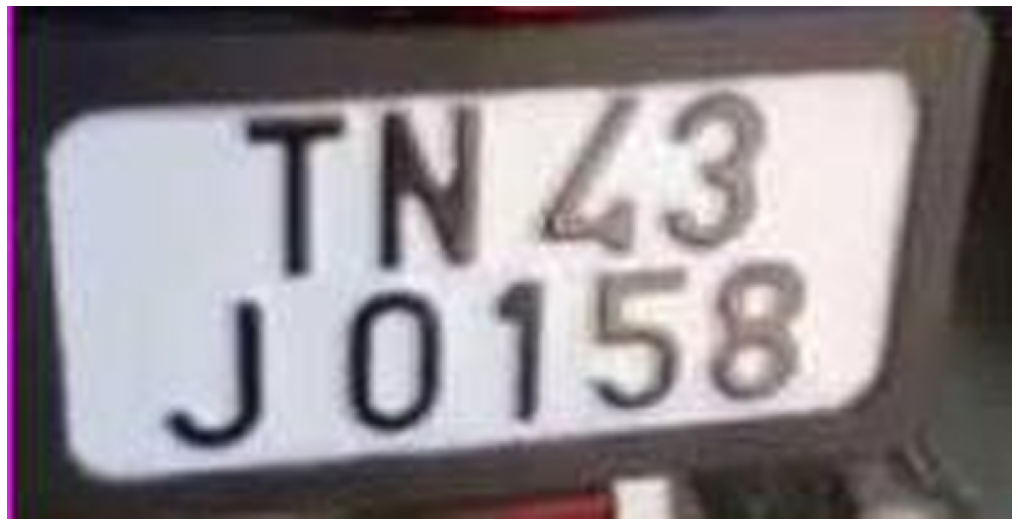

TNZ3 J 0158 

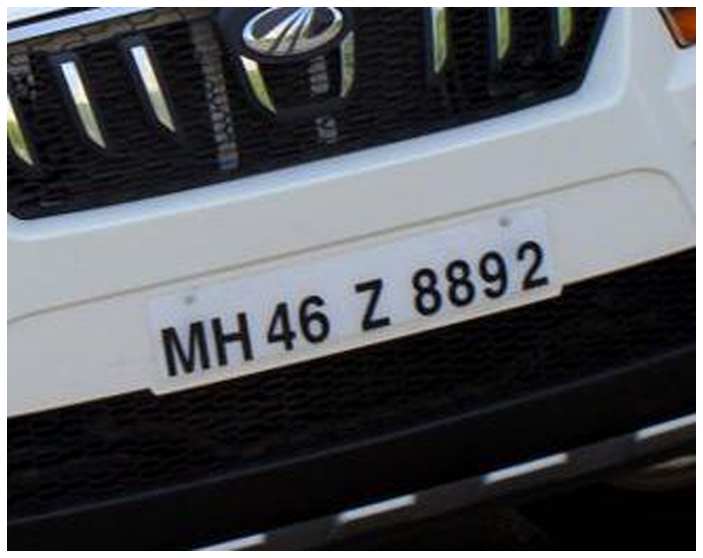

MH46 Z 8892 

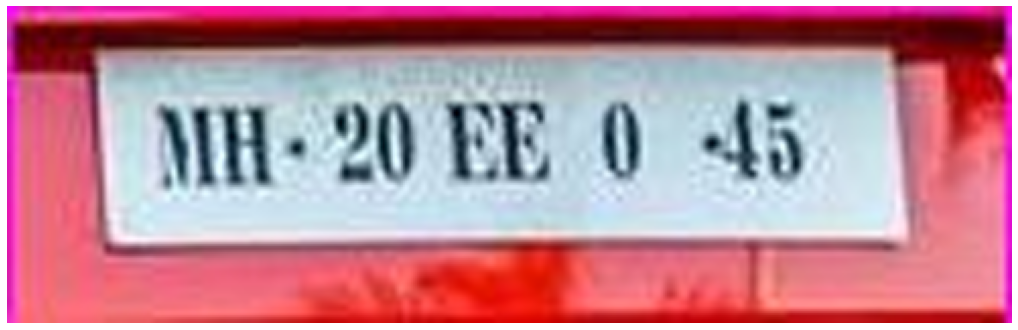

In [ ]:
i=0
while i<len(image_name):    
  imShow(image_name[i])
  j=0
  while j<len(image_number[i]):
    print(image_number[i][j],end=" ")
    j+=1
  i+=1


In [ ]:
print(image_name)

['118.jpg0.jpg', '131.jpg', '216.jpg0.jpg']
